# Cell state x motif plot (negative motifs)

Plot showing which motifs were extracted from each cell type (for the curated motif set).

Inputs:
1. Cluster config
2. One file per cell state with motif annotation and number of seqlets.

In [2]:
library(ggplot2)
library(dplyr)
library(scales)

## Load inputs

In [3]:
STATE_ORDER = rev(c("Rod", 
                "OFFconebipolar", 
                "Mullerglia",
                "ONconebipolar",
                "Rodbipolar",
                "Cone",
                "GABAamacrine",
                "Horizontal",
                "Glyamacrine",
                "Retinalganglioncell",
                "AIIamacrine",
                "Astrocyte",
                "Microglia"))

### Per cell state annotated MoDISco motifs

In [5]:
modisco_annotated = list()

for (i in STATE_ORDER) {
    modisco_annotated[[i]] = read.table(sprintf("./tomtom_negative/%s.txt", i), 
                                        sep='\t', 
                                        header=T,
                                       stringsAsFactors=F)
    
}

head(modisco_annotated[[2]])

,Pattern,num_seqlets,match_1,q.value
,<chr>,<int>,<chr>,<dbl>
1,pattern_0,789,SNAI,1.98084e-14


In [36]:
# load positives to normalize against
modisco_annotated_pos = list()

for (i in STATE_ORDER) {
    modisco_annotated_pos[[i]] = read.table(sprintf("./tomtom/%s.txt", i), 
                                        sep='\t', 
                                        header=T,
                                       stringsAsFactors=F)
    
}

head(modisco_annotated_pos[[2]])

,Pattern,num_seqlets,match_1,q.value
,<chr>,<int>,<chr>,<dbl>
1,pattern_0,6584,CTCF,5.61915e-36
2,pattern_1,6238,NFI,1.09986e-38
3,pattern_2,4682,SP,2.88422e-34
4,pattern_3,3837,NFY,1.41074e-27
5,pattern_4,2966,AP-1,4.17489e-15
6,pattern_5,2533,SOX:SOX,1.74204e-37


## Plot

Motifs with ":" are dimers of 30 curated motifs, which can be ignored for now.

Multiple patterns can match to the same motif.

In [6]:
QVAL = 0.05

In [7]:
motif_names = c()

for (i in STATE_ORDER) {
    motif_names = c(motif_names , modisco_annotated[[i]]$match_1)
}
motif_names = rev(sort(table(motif_names)))

In [8]:
motif_names

motif_names
                   SNAI                   ZBTB7                     NFY 
                      6                       3                       3 
       UNKNOWN(ttCTTga)             UNKNOWN:ZNF           UNKNOWN(ATAT) 
                      2                       2                       1 
       UNKNOWN(AT-RICH)                     OTX                   MYT1L 
                      1                       1                       1 
 MAYBE:ZNF692(tGG.CCCa) MAYBE:ZBTB7-ALT(tGGTGG) 
                      1                       1 

In [9]:
MOTIF_SUBSET = read.table("../20241103_motif_consolidation/tfs_final_w_rep_negative.tsv", stringsAsFactor=F)$V4

In [48]:
filtered_modisco = list()

for (i in STATE_ORDER) {
    cur = modisco_annotated[[i]]
    cur = cur[cur$q.value < QVAL, ]
    # cur$frac = cur$num_seqlets/sum(cur$num_seqlets)
    cur$frac = cur$num_seqlets/sum(modisco_annotated_pos[[i]]$num_seqlets)
    
    cur = cur[cur$match_1 %in% MOTIF_SUBSET, c("frac", "match_1")]
    cur = cur %>% group_by(match_1) %>% summarize_all(sum)
    cur$log10_frac = log10(cur$frac)
    
    filtered_modisco[[i]] = cur
}

In [49]:
plot_df = data.frame()

for (i in STATE_ORDER) {
    cur = filtered_modisco[[i]]
    cur$state = i
    
    plot_df = rbind(plot_df, cur)
}

In [75]:
missing_states <- setdiff(STATE_ORDER, unique(plot_df$state))

# Create placeholder rows for missing states
placeholder_rows <- data.frame(match_1 = "MYT1L", 
                               frac = NA, 
                               log10_frac = NA, 
                               state = missing_states, 
                               stringsAsFactors = FALSE)

In [76]:
plot_df_complete <- rbind(plot_df, placeholder_rows)

In [77]:
plot_df_complete

match_1,frac,log10_frac,state
<chr>,<dbl>,<dbl>,<chr>
SNAI,0.020024364,-1.698441,Astrocyte
NFY,0.005421416,-2.265887,Retinalganglioncell
SNAI,0.005765213,-2.239185,Retinalganglioncell
ZBTB7,0.006505699,-2.186706,Retinalganglioncell
SNAI,0.014830736,-1.828837,Horizontal
UNKNOWN:ZNF,0.002901666,-2.537353,Horizontal
UNKNOWN(AT-RICH),0.003439011,-2.463566,Horizontal
UNKNOWN(ttCTTga),0.004271897,-2.369379,Horizontal
ZBTB7,0.005964535,-2.224423,Horizontal


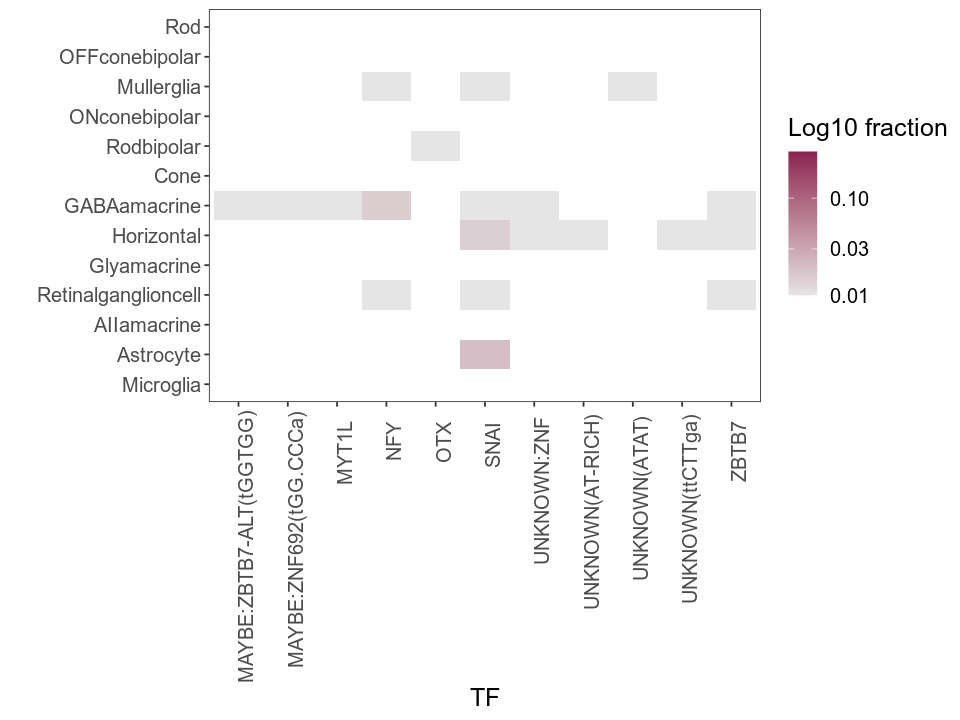

In [78]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(plot_df_complete) +
geom_tile(aes(x=match_1, y=factor(state, levels=STATE_ORDER), fill=frac)) +
scale_fill_gradient(low="gray90",
                      high="violetred4",
                      limits=c(0.01, 0.3),
                      oob=squish,
                      trans='log10', 
                      name="Log10 fraction",
                   na.value = "white") +
xlab("TF") +
ylab("") +
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust=0.95), # rotate TF text
      strip.background = element_blank(),
      panel.grid.major = element_blank(),
          text = element_text(size=15)) 

Order for TFs based on similarity

In [79]:
head(plot_df)

match_1,frac,log10_frac,state
<chr>,<dbl>,<dbl>,<chr>
SNAI,0.020024364,-1.698441,Astrocyte
NFY,0.005421416,-2.265887,Retinalganglioncell
SNAI,0.005765213,-2.239185,Retinalganglioncell
ZBTB7,0.006505699,-2.186706,Retinalganglioncell
SNAI,0.014830736,-1.828837,Horizontal
UNKNOWN:ZNF,0.002901666,-2.537353,Horizontal


In [80]:
plot_df[1, ]$match_1

[1] "SNAI"

In [85]:
which(MOTIF_SUBSET == plot_df[1, "match_1"])

integer(0)

In [86]:
which(MOTIF_SUBSET == "CTCF")

integer(0)

In [87]:
plot_df[3, ]

match_1,frac,log10_frac,state
<chr>,<dbl>,<dbl>,<chr>
SNAI,0.005765213,-2.239185,Retinalganglioncell


In [88]:
log10_matrix = matrix(1, length(MOTIF_SUBSET), length(STATE_ORDER))

log10_matrix = (min(plot_df$log10_frac) - 1)*log10_matrix

for (i in seq(nrow(plot_df))) {
    log10_matrix[which(MOTIF_SUBSET == plot_df[i, ]$match_1), as.numeric(factor(plot_df[i,]$state, levels=STATE_ORDER))] = plot_df[i,]$log10_frac
}

log10_matrix = t(log10_matrix)

# will use this for re-ordering on membership matrix

In [89]:
membership_matrix = matrix(0, length(MOTIF_SUBSET), length(STATE_ORDER))

for (i in seq(nrow(plot_df))) {
    membership_matrix[which(MOTIF_SUBSET == plot_df[i, ]$match_1), as.numeric(factor(plot_df[i,]$state, levels=STATE_ORDER))] = 1 
}

membership_matrix = t(membership_matrix)

In [90]:
tf_hclust = hclust(dist(t(membership_matrix), method = "euclidean"), method = "ward.D") # trying to order by membership
tf_dendro = as.dendrogram(tf_hclust)
# tf_dendro = reorder(tf_dendro, colSums(log10_matrix* seq(1,length(MOTIF_SUBSET)))/colSums(log10_matrix))
tf_dendro = reorder(tf_dendro, colSums(membership_matrix))
tf_order = as.hclust(tf_dendro)$order

In [91]:
tf_order

[1]  7  3  4  1  5  2 11  9 10  8  6

In [92]:
MOTIF_SUBSET[tf_order]

[1] "MAYBE:ZBTB7-ALT(tGGTGG)" "MYT1L"                  
 [3] "MAYBE:ZNF692(tGG.CCCa)"  "NFY"                    
 [5] "SNAI"                    "OTX"                    
 [7] "UNKNOWN(ATAT)"           "UNKNOWN(AT-RICH)"       
 [9] "UNKNOWN(ttCTTga)"        "UNKNOWN:ZNF"            
[11] "ZBTB7"

In [93]:
# manual adjustements
# move OTX:OTX together 
# bring TFAP2 before SPI (since it's exclusive)

In [94]:
length(tf_order)

[1] 11

In [95]:
# tf_order = tf_order[c(c(1,3,4,5,2), 6:9, 17, 10:16, 18:29)]

In [96]:
MOTIF_SUBSET[tf_order]

[1] "MAYBE:ZBTB7-ALT(tGGTGG)" "MYT1L"                  
 [3] "MAYBE:ZNF692(tGG.CCCa)"  "NFY"                    
 [5] "SNAI"                    "OTX"                    
 [7] "UNKNOWN(ATAT)"           "UNKNOWN(AT-RICH)"       
 [9] "UNKNOWN(ttCTTga)"        "UNKNOWN:ZNF"            
[11] "ZBTB7"

In [97]:
tf_order

[1]  7  3  4  1  5  2 11  9 10  8  6

In [98]:
length(tf_order)

[1] 11

In [99]:
MOTIF_SUBSET[tf_order]

[1] "MAYBE:ZBTB7-ALT(tGGTGG)" "MYT1L"                  
 [3] "MAYBE:ZNF692(tGG.CCCa)"  "NFY"                    
 [5] "SNAI"                    "OTX"                    
 [7] "UNKNOWN(ATAT)"           "UNKNOWN(AT-RICH)"       
 [9] "UNKNOWN(ttCTTga)"        "UNKNOWN:ZNF"            
[11] "ZBTB7"

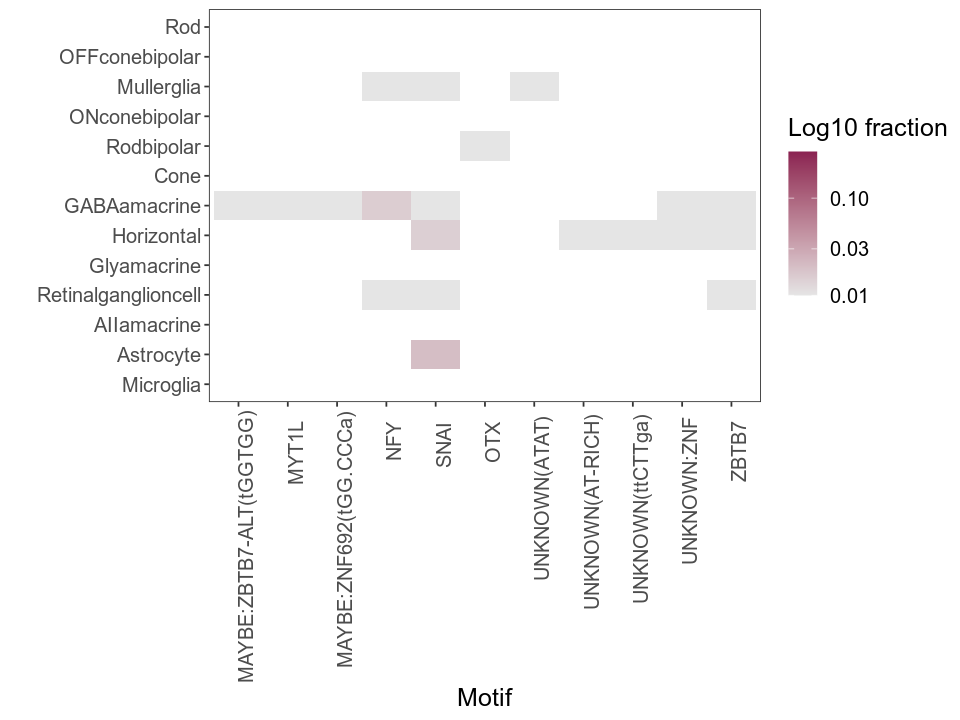

In [102]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(plot_df_complete) +
geom_tile(aes(x=factor(match_1, levels=MOTIF_SUBSET[tf_order]), y=factor(state, levels=STATE_ORDER), fill=frac)) +
scale_fill_gradient(low="gray90",
                      high="violetred4",
                      limits=c(0.01, 0.3),
                      oob=squish,
                      trans='log10', 
                      name="Log10 fraction",
                   na.value = "white") +
xlab("Motif") +
ylab("") +
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust=0.95), # rotate TF text
      strip.background = element_blank(),
      panel.grid.major = element_blank(),
          text = element_text(size=15)) 

In [103]:
ggsave("./figs/neg_motif_x_cell_state.pdf", height=6, width=8, useDingbats=F)